In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%pip install koreanize-matplotlib
from koreanize_matplotlib import koreanize
koreanize()


Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('./data/수산물_통합전처리_3컬럼.csv')

In [4]:
df

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종
0,(선)갈치,목포,5미,S/P,1,15.0,"110,000","110,000","110,000",갈치,2021,1,2021-01-01,선,갈치,갈치
1,(선)갈치,목포,10미,S/P,39,15.0,"200,000","30,000","141,700",갈치,2021,1,2021-01-01,선,갈치,갈치
2,(선)갈치,목포,중,S/P,3,20.0,"110,000","77,000","99,000",갈치,2021,1,2021-01-01,선,갈치,갈치
3,(선)갈치,목포,8미,S/P,25,20.0,"155,000","50,000","138,600",갈치,2021,1,2021-01-01,선,갈치,갈치
4,(선)갈치,삼천포,중,S/P,2,20.0,"200,000","200,000","200,000",갈치,2021,1,2021-01-01,선,갈치,갈치
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37550,(선)홍어,방어진,1미,kg,9.4,1.0,"8,500","8,500","8,500",홍어,2024,12,2024-12-01,선,홍어,홍어
37551,(선)홍어,인천,중,kg,127.3,1.0,"5,000","4,500","4,800",홍어,2024,12,2024-12-01,선,홍어,홍어
37552,(선)홍어,안흥,5/6미,kg,638.3,1.0,"3,500","3,000","3,100",홍어,2024,12,2024-12-01,선,홍어,홍어
37553,(선)홍어,방어진,6미,kg,49,1.0,"4,000","4,000","4,000",홍어,2024,12,2024-12-01,선,홍어,홍어


y : 평균가  
X : 파일어종, 산지, 규격, 포장, 수량, 중량

### 데이터 전처리 하기위해 카테고리컬 데이터로 나눈다.

In [ ]:
# 산지

In [4]:
# 그룹화 함수 정의
def group_area(area):
    수입산 = ['중국', '세네갈', '베네수엘라', '오만', '필리핀', '모로코', '대만', '인도', '일본',
            '러시아', '미국', '베트남', '스코틀랜드', '영국', '바누아투', '아르헨티나', '페루',
            '스페인', '뉴질랜드', '에콰도르', '우루과이', '칠레', '호주']

    원양산 = ['(원양)러시아', '(원양)노르웨이', '(원양)포클랜드', '(원양)아르헨티나', '기타(원양)']

    국내산_주요 = ['제주도', '완도', '여수', '군산', '안흥', '통영', '태안', '삼천포', '나로도',
                 '남해', '속초', '포항', '부산(기장)', '신안', '대천', '장항', '서천', '대부도',
                 '서산', '사천', '고흥', '흑산도', '임원', '강구', '동해시', '축산', '후포',
                 '방어진', '고창', '감포', '죽변', '충무', '마산', '순천', '안면도', '당진',
                 '화성', '거진', '고성', '구룡포', '강화', '연평도', '대진', '부안', '영흥도',
                 '삼척', '울진', '주문진', '영덕']
    
    기타_국내 = ['목포', '기타(국내)']

    if area in 수입산:
        return '수입산'
    elif area in 원양산:
        return '원양산'
    elif area in 국내산_주요:
        return '국내산(주요)'  # 주요 국내산은 개별 유지하거나 문자열로 반환 고민중
    elif area in 기타_국내:
        return '기타(국내)'
    else:
        return '기타'

# 데이터프레임 사용 시
df['산지_그룹화'] = df['산지'].apply(group_area)

In [ ]:
# 규격

In [5]:
def parse_regulation(s):
    s = str(s).strip()
    # 범위+단위: 예) 350/450미
    match = re.match(r'^(\d+)[/](\d+)\s*([가-힣A-Za-z]+)$', s)
    if match:
        num1 = int(match.group(1))
        num2 = int(match.group(2))
        unit = match.group(3)
        return ((num1 + num2) / 2, unit)
    # 단위 없는 범위: 예) 350/450
    match = re.match(r'^(\d+)[/](\d+)$', s)
    if match:
        num1 = int(match.group(1))
        num2 = int(match.group(2))
        return ((num1 + num2) / 2, np.nan)
    # 숫자+단위: 예) 10미
    match = re.match(r'^(\d+)\s*([가-힣A-Za-z]+)$', s)
    if match:
        num = int(match.group(1))
        unit = match.group(2)
        return (num, unit)
    # 소,중,대 등 이미 등급명
    if s in ['소', '중', '대']:
        return (np.nan, s)
    return (np.nan, np.nan)

In [7]:
df[['규격_수치', '규격_단위']] = df['규격'].apply(lambda x: pd.Series(parse_regulation(x)))
df['규격_등급'] = df.apply(classify_size, axis=1)

In [8]:
import numpy as np

def classify_size(row):
    fish = row['파일어종']
    value = row['규격_수치']
    unit = row['규격_단위']
    
    # 이미 등급형 단위면 그대로 반환
    if unit in ['소', '중', '대']:
        return unit

    # 어종별 미/코/g 등급 변환
    if fish == '명태':
        if unit == '미':
            if value >= 15: return '소'
            elif 8 <= value <= 14: return '중'
            elif value <= 7: return '대'
    elif fish == '고등어':
        if unit == '미':
            if value >= 20: return '소'
            elif 10 <= value <= 19: return '중'
            elif value <= 9: return '대'
    elif fish == '우럭':
        if unit == '미':
            if value >= 12: return '소'
            elif 7 <= value <= 11: return '중'
            elif value <= 6: return '대'
    elif fish == '갈치':
        if unit == '미':
            if value >= 12: return '소'
            elif 6 <= value <= 11: return '중'
            elif value <= 5: return '대'
    elif fish == '넙치':
        if unit == '미':
            if value >= 15: return '소'
            elif 8 <= value <= 14: return '중'
            elif value <= 5: return '대'
    elif fish == '오징어':
        if unit == '코':
            if value >= 30: return '소'
            elif 11 <= value <= 29: return '중'
            elif value <= 10: return '대'
    elif fish == '전복':
        if unit == '미':
            if value >= 15: return '소'
            elif 10 <= value <= 14: return '중'
            elif value <= 9: return '대'
    elif fish == '조기':
        if unit == '미':
            if value >= 20: return '소'
            elif 10 <= value <= 19: return '중'
            elif value <= 9: return '대'
    elif fish == '홍어':
        # 홍어 예시: 크기 정보 없으면 아래는 샘플
        if unit == '미':
            if value < 2: return '소'
            elif 2 <= value < 5: return '중'
            elif value >= 5: return '대'
    elif fish == '꽁치':
        if unit == '미':
            if value >= 40: return '소'
            elif 20 <= value <= 39: return '중'
            elif value <= 19: return '대'
    elif fish == '대구':
        if unit == '미':
            if value >= 12: return '소'
            elif 6 <= value <= 11: return '중'
            elif value <= 5: return '대'
    elif fish == '바지락':
        if unit == '미':
            if value < 30: return '소'
            elif 30 <= value <= 50: return '중'
            elif value > 50: return '대'
    return np.nan

# 적용 예시 (어종, 규격_수치, 규격_단위가 있는 DataFrame)
df['규격_등급'] = df.apply(classify_size, axis=1)


In [9]:
df.dropna(subset=['규격_등급'], inplace=True)

In [10]:
df # 행 5000개 정도 삭제

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종,산지_그룹화,규격_수치,규격_단위,규격_등급
0,(선)갈치,목포,5미,S/P,1,15.0,"110,000","110,000","110,000",갈치,2021,1,2021-01-01,선,갈치,갈치,기타(국내),5.0,미,대
1,(선)갈치,목포,10미,S/P,39,15.0,"200,000","30,000","141,700",갈치,2021,1,2021-01-01,선,갈치,갈치,기타(국내),10.0,미,중
2,(선)갈치,목포,중,S/P,3,20.0,"110,000","77,000","99,000",갈치,2021,1,2021-01-01,선,갈치,갈치,기타(국내),NaN,중,중
3,(선)갈치,목포,8미,S/P,25,20.0,"155,000","50,000","138,600",갈치,2021,1,2021-01-01,선,갈치,갈치,기타(국내),8.0,미,중
4,(선)갈치,삼천포,중,S/P,2,20.0,"200,000","200,000","200,000",갈치,2021,1,2021-01-01,선,갈치,갈치,국내산(주요),NaN,중,중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37550,(선)홍어,방어진,1미,kg,9.4,1.0,"8,500","8,500","8,500",홍어,2024,12,2024-12-01,선,홍어,홍어,국내산(주요),1.0,미,소
37551,(선)홍어,인천,중,kg,127.3,1.0,"5,000","4,500","4,800",홍어,2024,12,2024-12-01,선,홍어,홍어,기타,NaN,중,중
37552,(선)홍어,안흥,5/6미,kg,638.3,1.0,"3,500","3,000","3,100",홍어,2024,12,2024-12-01,선,홍어,홍어,국내산(주요),5.5,미,대
37553,(선)홍어,방어진,6미,kg,49,1.0,"4,000","4,000","4,000",홍어,2024,12,2024-12-01,선,홍어,홍어,국내산(주요),6.0,미,대


In [ ]:
# 포장

In [11]:
def standardize_package(s):
    package = str(s).lower()
    # 박스 계열
    if package in ['s/p', 'box', 'c/s(상자)', 'ct/(bt)']:
        return '박스'
    elif 'kg' in package or 'g' in package or 'd/m' in package:
        return '중량'
    elif any(x in package for x in ['미', '손', '두름', '장', '봉지', '포', '망', '봉', '단', '가구', '펜']):
        return '개수/묶음'
    else:
        return '기타'

df['포장_분류'] = df['포장'].apply(standardize_package)

### 데이터타입 설정

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32418 entries, 0 to 37554
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   어종      32418 non-null  object 
 1   산지      32418 non-null  object 
 2   규격      32418 non-null  object 
 3   포장      32418 non-null  object 
 4   수량      32418 non-null  object 
 5   중량      32418 non-null  float64
 6   낙찰고가    32418 non-null  object 
 7   낙찰저가    32418 non-null  object 
 8   평균가     32418 non-null  object 
 9   파일어종    32418 non-null  object 
 10  year    32418 non-null  int64  
 11  month   32418 non-null  int64  
 12  date    32418 non-null  object 
 13  전처리     32418 non-null  object 
 14  품목명     32418 non-null  object 
 15  공통어종    32418 non-null  object 
 16  산지_그룹화  32418 non-null  object 
 17  규격_수치   19957 non-null  float64
 18  규격_단위   32418 non-null  object 
 19  규격_등급   32418 non-null  object 
 20  포장_분류   32418 non-null  object 
dtypes: float64(2), int64(2), object(17)
memo

In [13]:
df['평균가'] = df['평균가'].str.replace(',', '').astype(float)

In [14]:
df['수량'] = df['수량'].str.replace(',', '').astype(float)

In [15]:
df['date'] = pd.to_datetime(df['date'])

### X,y 데이터 분리

In [52]:
df

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,...,month,date,전처리,품목명,공통어종,산지_그룹화,규격_수치,규격_단위,규격_등급,포장_분류
0,(선)갈치,목포,5미,S/P,1.0,15.0,"110,000","110,000",110000.0,갈치,...,1,2021-01-01,선,갈치,갈치,기타(국내),5.0,미,대,박스
1,(선)갈치,목포,10미,S/P,39.0,15.0,"200,000","30,000",141700.0,갈치,...,1,2021-01-01,선,갈치,갈치,기타(국내),10.0,미,중,박스
2,(선)갈치,목포,중,S/P,3.0,20.0,"110,000","77,000",99000.0,갈치,...,1,2021-01-01,선,갈치,갈치,기타(국내),NaN,중,중,박스
3,(선)갈치,목포,8미,S/P,25.0,20.0,"155,000","50,000",138600.0,갈치,...,1,2021-01-01,선,갈치,갈치,기타(국내),8.0,미,중,박스
4,(선)갈치,삼천포,중,S/P,2.0,20.0,"200,000","200,000",200000.0,갈치,...,1,2021-01-01,선,갈치,갈치,국내산(주요),NaN,중,중,박스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37550,(선)홍어,방어진,1미,kg,9.4,1.0,"8,500","8,500",8500.0,홍어,...,12,2024-12-01,선,홍어,홍어,국내산(주요),1.0,미,소,중량
37551,(선)홍어,인천,중,kg,127.3,1.0,"5,000","4,500",4800.0,홍어,...,12,2024-12-01,선,홍어,홍어,기타,NaN,중,중,중량
37552,(선)홍어,안흥,5/6미,kg,638.3,1.0,"3,500","3,000",3100.0,홍어,...,12,2024-12-01,선,홍어,홍어,국내산(주요),5.5,미,대,중량
37553,(선)홍어,방어진,6미,kg,49.0,1.0,"4,000","4,000",4000.0,홍어,...,12,2024-12-01,선,홍어,홍어,국내산(주요),6.0,미,대,중량


In [54]:
df.to_csv('ai데이터가공.csv')

In [17]:
y = df['평균가']

In [18]:
X = df[['파일어종','산지_그룹화','규격_등급','포장_분류','수량','중량']]

### X 데이터 전처리

In [19]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [46]:
X

,파일어종,산지_그룹화,규격_등급,포장_분류,수량,중량
0,갈치,기타(국내),대,박스,1.0,15.0
1,갈치,기타(국내),중,박스,39.0,15.0
2,갈치,기타(국내),중,박스,3.0,20.0
3,갈치,기타(국내),중,박스,25.0,20.0
4,갈치,국내산(주요),중,박스,2.0,20.0
...,...,...,...,...,...,...
37550,홍어,국내산(주요),소,중량,9.4,1.0
37551,홍어,기타,중,중량,127.3,1.0
37552,홍어,국내산(주요),대,중량,638.3,1.0
37553,홍어,국내산(주요),대,중량,49.0,1.0


In [21]:
ct = ColumnTransformer([('onehot', OneHotEncoder(), [0,1,2,3]),
                        ('scaler', MinMaxScaler(), [4,5])
                       ])

### y 데이터 전처리

In [51]:
scaler_y = MinMaxScaler()

In [67]:
y_scaled=scaler_y.fit_transform(y.values.reshape(-1,1))

In [68]:
y_scaled

array([[0.05111866],
       [0.06586353],
       [0.04600214],
       ...,
       [0.00139541],
       [0.00181404],
       [0.00423276]])

### 모델 설정

In [22]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [23]:
model1 = RandomForestRegressor(n_estimators=500)

### 파이프라이닝

In [24]:
from sklearn.pipeline import Pipeline

In [25]:
pipe = Pipeline(steps=[('preprocessing', ct), ('regressor1', model1)])

### 훈련용, 테스트용 코드 나누기

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2)

### 학습

In [28]:
pipe.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('regressor1', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehot', ...), ('scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [29]:
y_pred1 = pipe.predict(X_test)

In [30]:
y_pred1

array([ 29569.14144256, 139357.39240864, 143422.89633088, ...,
        98306.91745022,  42473.95920635,  14057.4       ])

In [31]:
y_test

1941      47000.0
7409     250000.0
9773     130000.0
20390     11200.0
14130      5000.0
           ...   
14639      4000.0
20531     48900.0
4605      57500.0
6574      48800.0
15376      1100.0
Name: 평균가, Length: 6484, dtype: float64

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
mean_squared_error(y_test,y_pred1)

5688887183.669191

In [35]:
r2_score(y_test, y_pred1)

0.4827583135750676

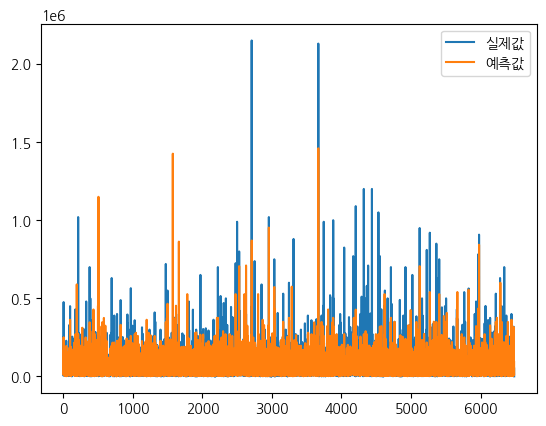

In [36]:
plt.plot(y_test.values)
plt.plot(y_pred1)
plt.legend(['실제값','예측값'])
plt.show()

In [80]:
df_test = y_test.to_frame().reset_index(drop=True)

In [82]:
df_test['y_pred'] = y_pred1

In [87]:
df_test

,평균가,y_pred
0,90000.0,73909.727609
1,84000.0,89908.500000
2,130000.0,78280.072048
3,19100.0,46354.736752
4,260000.0,302717.916667
...,...,...
6479,84000.0,125338.471931
6480,1900.0,5132.000000
6481,8000.0,216907.557071
6482,60400.0,45053.038681


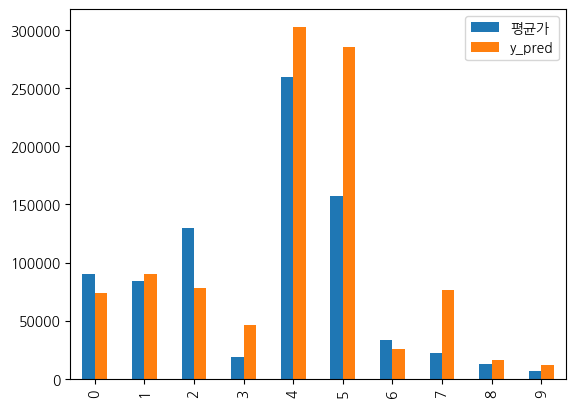

In [88]:
df_test.head(10).plot(kind='bar')
plt.show()

In [78]:
from sklearn.model_selection import GridSearchCV

In [122]:
model1 = RandomForestRegressor()

In [130]:
param_grid = {'regressor1__n_estimators' : [50, 100, 200, 300, 400],
              'regressor1__max_depth': [None, 10,20,30],
              'regressor1__min_samples_split' : [2,5,10],
              'regressor1__min_samples_leaf' : [1,2,4]
             }

In [131]:
grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=10, verbose=2)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   6.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   6.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   6.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   6.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   6.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   6.7s
[CV] END regressor1__max_depth=None

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   7.0s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   7.0s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   6.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=  13.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=  13.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=  13.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_spli

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=  13.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=  13.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=  13.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  27.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  27.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  26.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  26.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  27.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  26.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  40.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  40.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  40.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  40.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  40.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  40.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  54.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  55.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  54.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  54.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  53.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  53.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   4.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   4.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   4.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_spli

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   4.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   4.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   4.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   8.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   8.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   8.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_spli

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   8.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   8.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   8.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  16.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  17.0s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  16.8s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  16.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  17.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  17.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  26.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  26.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  25.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  25.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  25.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  25.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  34.0s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  33.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  33.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  33.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  33.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  33.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   7.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   7.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   7.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_sample

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.8s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  13.8s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  13.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  13.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_sam

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  14.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  13.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  13.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  20.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  20.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  21.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_sam

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  20.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  20.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  21.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  27.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  28.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  27.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_sam

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  27.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  28.0s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  27.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   4.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   4.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   4.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   4.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   4.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   4.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   8.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   8.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   8.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_spli

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   8.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   8.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   8.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  17.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  17.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  17.0s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  17.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  17.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  17.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  26.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  25.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  25.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  25.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  26.0s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  25.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  34.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  34.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  34.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  34.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  35.0s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  34.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   4.0s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   3.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   3.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_spli

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   3.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   3.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   3.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   8.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   8.0s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   8.0s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_spli

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   7.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   8.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   8.0s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  16.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  15.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  15.8s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  15.8s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  15.8s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  15.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  23.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  23.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  23.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  26.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  26.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  24.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  31.8s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  31.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  32.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  32.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  31.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  31.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_sample

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  13.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  13.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  13.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_sam

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  13.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  13.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  13.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  20.8s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  20.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  20.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_sam

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  20.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  19.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  20.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  26.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  26.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  26.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_sam

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  26.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  26.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  26.0s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   3.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   3.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   3.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   3.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   3.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   3.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   6.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   6.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   6.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_spli

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   6.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   6.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   6.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  12.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  12.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  12.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  12.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  13.0s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  12.8s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  19.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  19.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  19.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  19.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  19.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  19.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  25.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  26.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  26.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  25.8s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  26.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  25.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   3.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   3.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   3.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_spli

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   3.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   3.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   3.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   6.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   6.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   6.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_spli

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   6.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   6.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   6.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  13.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  13.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  13.0s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  13.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  13.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  12.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  19.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  19.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  19.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  20.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  20.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  19.8s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  26.8s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  26.8s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  26.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  26.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  26.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  25.9s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_s

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_sample

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  13.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  12.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  12.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_sam

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  12.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  12.5s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  12.4s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  18.8s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  18.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  18.6s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_sam

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  18.7s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  19.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  19.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  25.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  25.3s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  25.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_sam

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  25.2s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  25.1s
[CV] END regressor1__max_depth=None, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  25.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   1.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   1.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   1.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, 

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   1.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   1.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   1.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   3.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   3.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   3.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   3.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   3.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   3.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=   7.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=   7.1s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=   7.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=   7.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=   7.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=   7.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  11.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  11.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  11.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  10.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  10.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  11.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  14.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  14.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  14.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  15.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  16.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  16.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   1.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   1.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   1.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   2.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   1.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   1.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   3.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   3.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=   6.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=   7.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=   6.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=   6.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=   6.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=   6.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  10.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  11.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  12.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  13.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  13.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  12.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  13.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  13.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  13.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  13.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  13.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  13.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   1.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regre

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, re

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=   6.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=   6.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=   6.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10,

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=   6.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=   6.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=   6.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  10.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  10.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=   9.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10,

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=   9.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=   9.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=   9.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  13.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  13.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  13.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10,

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  13.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  13.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  13.1s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   1.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   3.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   3.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=   6.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=   6.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=   6.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=   6.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=   6.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=   6.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  10.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  10.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  10.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  10.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  10.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  10.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  13.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  39.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=17.6min
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  13.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  13.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  14.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   1.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   1.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   1.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   1.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   3.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   3.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=   7.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=   6.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=   6.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=   6.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=   6.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=   6.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  10.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  10.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  10.1s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  10.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  10.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  10.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  13.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  13.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  13.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  13.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  13.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  13.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   1.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regre

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, re

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=   6.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=   6.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=   6.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10,

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=   6.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=   6.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=   6.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=   9.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=   9.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=   9.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10,

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=   9.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  10.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=   9.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  13.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  13.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  13.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10,

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  13.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  13.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=2, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  13.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=   6.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=   6.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=   6.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=   6.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=   6.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=   6.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  10.1s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  10.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=   9.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  10.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=   9.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=   9.9s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  13.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  13.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  13.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  13.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  13.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  13.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=   6.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=   6.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=   6.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=   6.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=   6.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=   6.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  10.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  10.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time= 2.7min
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  10.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  10.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  10.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  13.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  13.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  13.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  13.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  13.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  13.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   1.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regre

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   1.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   3.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, re

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   3.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=   6.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=   6.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=   6.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10,

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=   6.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=   6.6s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=   6.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  10.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  10.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=   9.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10,

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  10.3s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  10.5s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=   9.8s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  13.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  13.7s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  14.0s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10,

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  13.2s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  13.4s
[CV] END regressor1__max_depth=10, regressor1__min_samples_leaf=4, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  13.1s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   5.9s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   5.5s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   5.5s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   5.4s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   5.4s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   5.4s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=  10.9s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=  10.8s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=  10.8s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=  10.9s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=  10.8s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=  10.7s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  21.8s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  21.6s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  21.5s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  21.7s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  21.4s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  21.3s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  32.8s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  32.5s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  32.4s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  32.7s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  32.3s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  32.0s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  43.5s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  43.3s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  42.8s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=27.5min
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=13.9min
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=2, regressor1__n_estimators=400; total time=  42.3s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   3.8s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   3.8s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   3.8s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   3.8s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   3.7s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=50; total time=   3.7s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   7.6s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   7.5s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   7.5s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   7.5s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   7.5s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=100; total time=   7.4s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  15.1s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  15.1s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  15.0s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  15.0s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  15.0s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=200; total time=  14.8s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  22.6s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  22.6s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  22.4s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  22.6s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  22.6s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=300; total time=  22.4s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  30.1s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  49.2s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  30.9s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  31.6s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  31.5s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=5, regressor1__n_estimators=400; total time=  30.8s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.2s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.2s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.2s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regre

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.2s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.2s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=50; total time=   3.2s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.4s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.7s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.6s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, re

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.6s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.7s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=100; total time=   6.7s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  13.0s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  13.4s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  12.9s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10,

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  13.0s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  13.1s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=200; total time=  12.9s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  19.7s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  19.6s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  19.6s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10,

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  19.6s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  19.6s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=300; total time=  19.8s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  26.4s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  26.6s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  26.5s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10,

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  26.7s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  26.3s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=1, regressor1__min_samples_split=10, regressor1__n_estimators=400; total time=  26.4s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   4.0s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   4.0s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   4.0s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   4.0s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   3.9s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=50; total time=   3.9s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   7.8s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   7.8s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   7.9s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   7.9s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   7.7s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=100; total time=   8.0s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  16.1s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  16.0s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  15.6s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regres

/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 400, in _score
    y_pred = method_caller(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/opt/miniconda3/envs/yh/lib/python3.10/site-packages/sklearn/utils/_

[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  15.9s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  15.6s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=200; total time=  15.9s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  23.6s
[CV] END regressor1__max_depth=20, regressor1__min_samples_leaf=2, regressor1__min_samples_split=2, regressor1__n_estimators=300; total time=  23.3s


### 모델저장

In [41]:
import joblib

In [43]:
joblib.dump(pipe, 'pipe.pkl')

['pipe.pkl']

In [44]:
pipe = joblib.load('pipe.pkl')

### 새로운 데이터 예측

In [47]:
new_data = [{'파일어종':'갈치', '산지_그룹화':'국내산(주요)', '규격_등급':'중','포장_분류':'박스', '수량':2, '중량':20}]

In [48]:
new_df=pd.DataFrame(new_data)

In [50]:
y_pred_new=pipe.predict(new_df)

In [51]:
y_pred_new

array([249962.6012987])